# **Lab: Time-Series**



## Exercise 3: Facebook Prophet

We will train a Prophet model on the same dataset as previously.


**Pre-requisites:**
- Create a github account (https://github.com/join)
- Install git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Install Docker (https://docs.docker.com/get-docker/)

The steps are:
1.   Launch Docker image
2.   Load and Prepare Data
3.   Train Prophet model with default hyperparameter
4.   Train Prophet model with holidays
5.   Train Prophet model with monthly seasonality
6.   Push changes


### 1. Launch Docker image

**[1.1]** Go to the folder you created previously `adv_dsi_lab_2`

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Go to the folder you created previously adv_dsi_lab_2

In [ ]:
#Solution:
cd ~/Projects/adv_dsi/adv_dsi_lab_2

**[1.2]** Run the built Docker image

In [ ]:
docker run  -dit --rm --name adv_dsi_lab_2 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi/adv_dsi_lab_2:/home/jovyan/work -v ~/Projects/adv_dsi/src:/home/jovyan/work/src fbprophet-notebook:latest

Syntax: docker run [OPTIONS] IMAGE

Options:

`-dit: Run container in background and interactive`

`--rm: Automatically remove the container when it exits`

`--name: Assign a name to the container`

`-p: Publish a container's port(s) to the host`

`-e: Set environment variables`

`-v Bind mount a volume`

Documentation: https://docs.docker.com/engine/reference/commandline/run/

**[1.3]** Display last 50 lines of logs

In [ ]:
docker logs --tail 50 adv_dsi_lab_2

Syntax: docker logs [OPTIONS] CONTAINER

Options:

`--tail: Number of lines to show from the end of the logs`

Documentation: https://docs.docker.com/engine/reference/commandline/logs/

Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.4]** Create a new git branch called `prophet_default`

In [ ]:
git checkout -b prophet_default

Documentation: https://www.atlassian.com/git/tutorials/using-branches/git-checkout

**[1.7]** Navigate the folder `notebooks` and create a new jupyter notebook called `3_fb_prophet.ipynb`

### 2. Load Data

**[2.1]** Import the pandas and numpy package

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Import the pandas and numpy package

In [ ]:
# Solution
import pandas as pd
import numpy as np

**[2.2]** Load the dataset from `data/raw`



In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Load the dataset into dataframe called df

In [ ]:
#Solution:
df = pd.read_csv('../data/raw/day.csv')

**[2.3]** Create a copy of df and save it into a variable called df_cleaned

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a copy of df and save it into a variable called df_cleaned

In [ ]:
# Solution
df_cleaned = df.copy()

**[2.4]** Import your new function `convert_to_date` from `src.features.dates` and convert the column `dteday` with your function

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Import your new function convert_to_date from src.features.dates and convert the column dteday with your function

In [ ]:
from src.features.dates import convert_to_date

df_cleaned = convert_to_date(df_cleaned, ['dteday'])

**[2.5]** Create a new dataframe `prophet_df` that contains only the columns `dteday` and `cnt` from `df_cleaned`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a new dataframe prophet_df that contains only the columns dteday and cnt from df_cleaned

In [ ]:
# Solution
prophet_df = df_cleaned[['dteday', 'cnt']]

**[2.6]** Rename the columns of `prophet_df` to `ds` and `y`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Rename the columns of prophet_df to ds and y

In [ ]:
# Solution
prophet_df.columns = ['ds', 'y']

**[2.7]** Save the dataframe in the `data/processed/` folder

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Save the dataframe in the `data/processed/` folder

In [ ]:
# Solution
prophet_df.to_csv('../data/processed/day_prophet.csv', index=False)

# 3. Train Prophet model with default hyperparameter

**[3.1]** Import the Prophet module from fbprophet


In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import the Prophet module from fbprophet

In [ ]:
# Solution:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


**[3.2]** Instantiate the Prophet class into a variable called prophet

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate the Prophet class into a variable called prophet

In [ ]:
# Solution
prophet = Prophet()

**[3.3]** Task: Fit the model with the prepared data

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Fit the model with the prepared data

In [ ]:
# Solution
prophet.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**[3.4]** Import `dump` from `joblib` and save the fitted model into the folder `models` as a file called `prophet_default`

In [ ]:
# Placeholder for student's code (2 line of Python code)
# Task: Import dump from joblib and save the fitted model into the folder models as a file called prophet_default

In [ ]:
# Solution:
from joblib import dump 

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

**[3.5]** Create a new dataframe containing future dates for next 6 months using `make_future_dataframe()`


In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a new dataframe containing future dates for next 6 months using make_future_dataframe()

In [ ]:
# Solution:
future = prophet.make_future_dataframe(freq='D', periods=30*6)

**[3.6]** Forecast the future dates with `predict()` and save the results in a variable called `forecast`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Forecast the future dates with predict() and save the results in a variable called forecast

In [ ]:
# Solution
forecast = prophet.predict(future)

**[3.7]** Plot the forecasts of this model with `plot()`

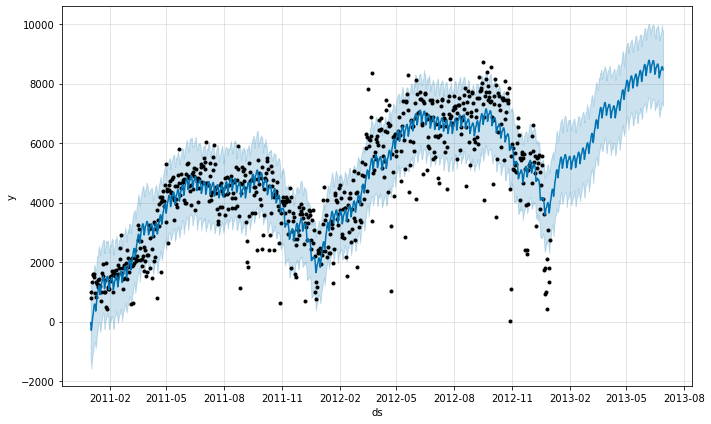

In [ ]:
fig1 = prophet.plot(forecast)

**[3.8]** Plot the components of this model with `plot_components()`



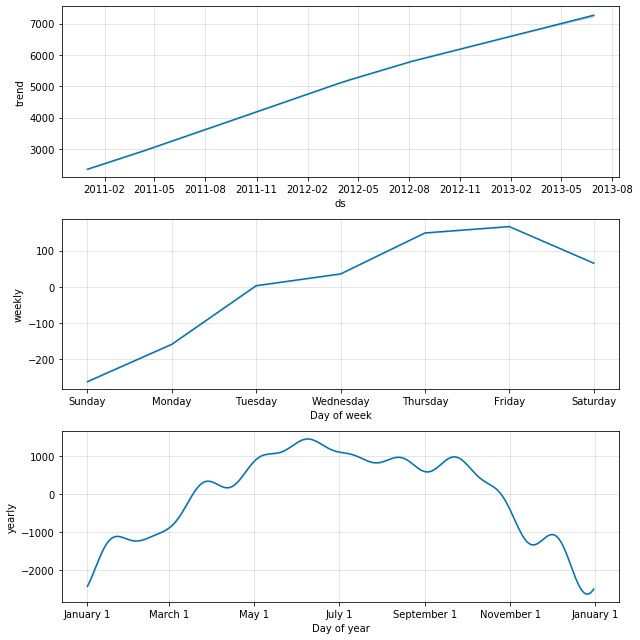

In [ ]:
fig2 = prophet.plot_components(forecast)

**[3.9]** Import cross_validation from fbprophet.diagnostics

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import cross_validation from fbprophet.diagnostics

In [ ]:
# Solution
from fbprophet.diagnostics import cross_validation

**[3.10]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')


In [ ]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


**[3.11]** Import performance_metrics from fbprophet.diagnostics

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import performance_metrics from fbprophet.diagnostics

In [ ]:
# Solution
from fbprophet.diagnostics import performance_metrics

**[3.12]** Calculate performance metrics on the cross validation

In [ ]:
metrics_results = performance_metrics(cv_results)

**[3.13]** Import plot_cross_validation_metric from fbprophet.plot

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import plot_cross_validation_metric from fbprophet.plot

In [ ]:
# Solution
from fbprophet.plot import plot_cross_validation_metric

**[3.14]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

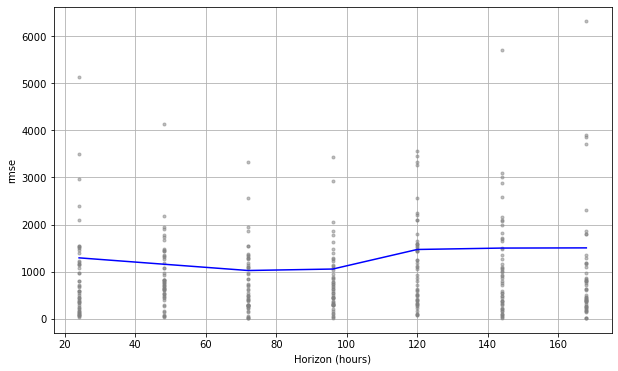

In [ ]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

### 4. Train Prophet model with holidays

**[4.1]** Instantiate the Prophet class into a variable called prophet1

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate the Prophet class into a variable called prophet1

In [ ]:
# Solution
prophet1 = Prophet()

**[4.2]** Add the US holidays component to the model

In [ ]:
prophet1.add_country_holidays(country_name='US')

**[4.3]** Fit the model with the prepared data

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Fit the model with the prepared data

In [ ]:
# Solution
prophet1.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**[4.4]** Save the fitted model into the folder `models` as a file called `prophet_holiday.joblib`

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Save the fitted model into the folder models as a file called prophet_holiday.joblib

In [ ]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

**[4.5]** Forecast the future dates with predict() and save the results in a variable called forecast1

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Forecast the future dates with predict() and save the results in a variable called forecast1

In [ ]:
# Solution:
forecast1 = prophet1.predict(future)

**[4.5]** Print the components of this model on the predictions

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Print the components of this model on the predictions

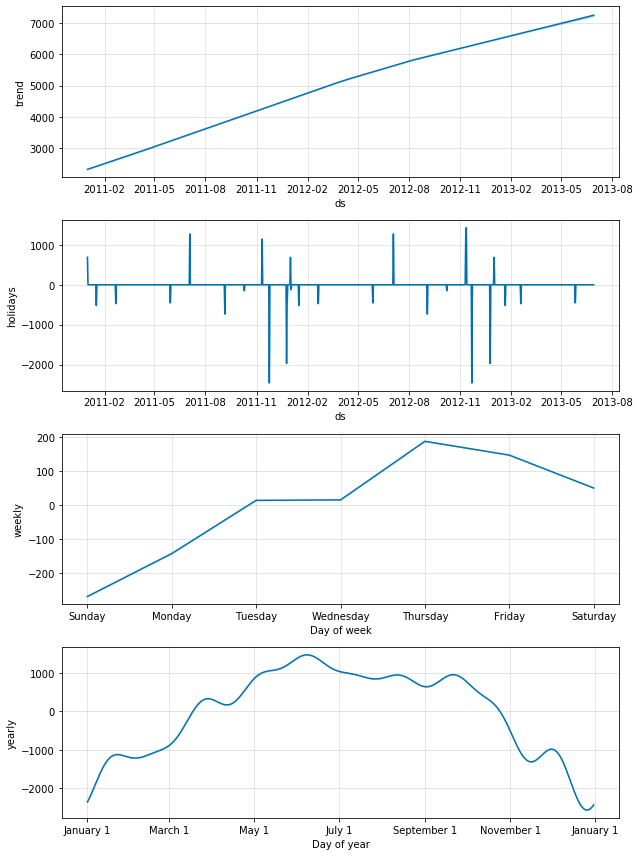

In [ ]:
# Solution:
fig1 = prophet1.plot_components(forecast1)

**[4.6]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [ ]:
# Solution:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


**[4.7]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Plot the RMSE score with plot_cross_validation_metric() on the cross validation results

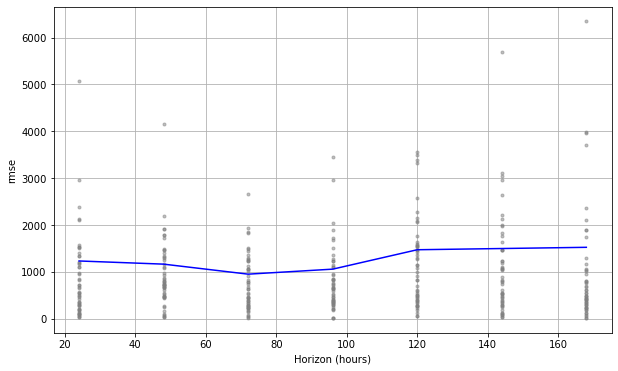

In [ ]:
# Solution:
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

### 5. Train Prophet model with monthly seasonality

**[5.1]** Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model

In [ ]:
# Solution
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

**[5.2]** Add a monthly seasonal component to the model with period=30.5 and fourier_order=5

In [ ]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

**[5.3]** Fit the model with the prepared data

In [ ]:
# Placeholder for student's code (1 line of code)
# Task: Fit the model with the prepared data

In [ ]:
# Solution
prophet2.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**[5.4]** Save the fitted model into the folder `models` as a file called `prophet_month.joblib`

In [ ]:
# Placeholder for student's code (2 line of Python code)
# Task: Save the fitted model into the folder models as a file called prophet_month.joblib

In [ ]:
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

**[5.5]** Forecast the future dates with predict() and save the results in a variable called forecast2

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Forecast the future dates with predict() and save the results in a variable called forecast2

In [ ]:
# Solution:
forecast2 = prophet2.predict(future)

**[5.6]** Print the components of this model on the predictions

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Print the components of this model on the predictions

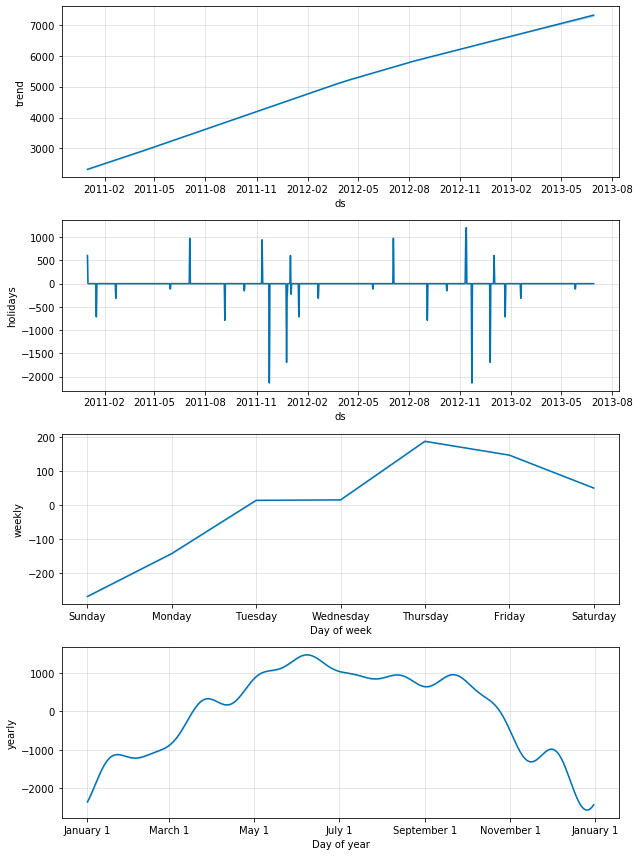

In [ ]:
# Solution:
fig1 = prophet2.plot_components(forecast2)

**[5.7]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [ ]:
# Solution:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


**[5.8]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Plot the RMSE score with plot_cross_validation_metric() on the cross validation results

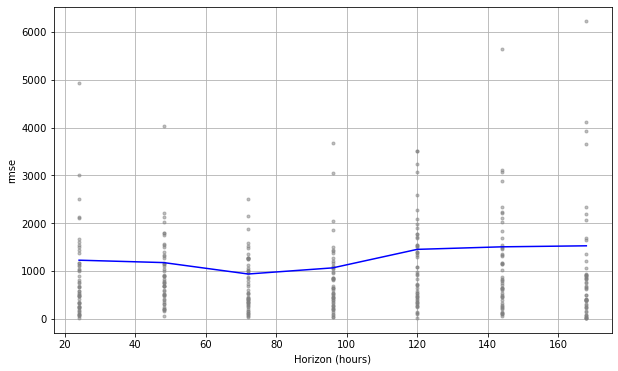

In [ ]:
# Solution:
fig2 = plot_cross_validation_metric(cv_results2, metric='rmse')

### 6.   Push changes

**[6.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Add you changes to git staging area

In [ ]:
# Solution:
git add .

**[6.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create the snapshot of your repository and add a description

In [ ]:
# Solution:
git commit -m "randomforest default"

**[6.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Push your snapshot to Github

In [ ]:
# Solution:
git push

**[6.4]** Check out to the master branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Check out to the master branch

In [ ]:
# Solution:
git checkout master

**[6.5]** Pull the latest updates

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Pull the latest updates

In [ ]:
git pull

**[6.6]** Check out to the `prophet_default` branch


In [ ]:
# Placeholder for student's code (1 command line)
# Task: Merge the branch prophet_default

In [ ]:
# Solution:
git checkout prophet_default

**[6.7]** Merge the `master` branch and push your changes

In [ ]:
# Placeholder for student's code (2 command lines)
# Task: Merge the master branch and push your changes

In [ ]:
# Solution:
git merge master
git push

Documentation: https://www.atlassian.com/git/tutorials/using-branches/git-merge

**[6.8]** Go to Github and merge the branch after reviewing the code and fixing any conflict




**[6.9]** Stop the Docker container

In [ ]:
docker stop adv_dsi_lab_2

Documentation: https://docs.docker.com/engine/reference/commandline/stop/